In [64]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


In [66]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [67]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


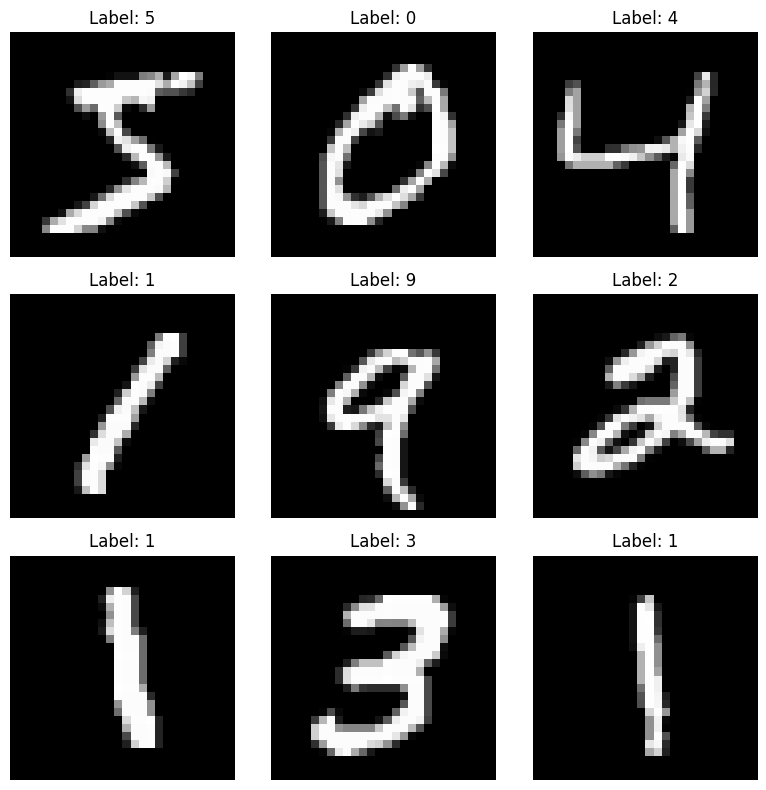

In [68]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

In [70]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=32)


Epoch 1/15
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1354 - accuracy: 0.9589 - val_loss: 0.0475 - val_accuracy: 0.9850
Epoch 2/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0430 - accuracy: 0.9862 - val_loss: 0.0388 - val_accuracy: 0.9877
Epoch 3/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0394 - val_accuracy: 0.9868
Epoch 4/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0275 - val_accuracy: 0.9905
Epoch 5/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0314 - val_accuracy: 0.9903
Epoch 6/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0257 - val_accuracy: 0.9917
Epoch 7/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0373 -

1/1 [==============================] - 0s 14ms/step


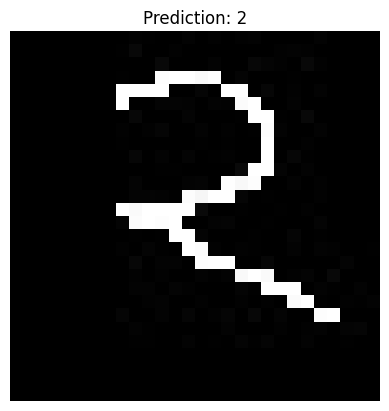

In [ ]:
image_path = r'Desktop\Hand_Written_Digit_Recognition\images\2.jpg'

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    image = cv2.resize(image, (28, 28))
    image = np.invert(image)
    image = image / 255.0
    image = np.array([image])

    output = model.predict(image)
    plt.imshow(image[0], cmap='gray')
    plt.title(f"Prediction: {np.argmax(output)}")
    plt.axis('off')
    plt.show()


In [72]:
model.save('hand_written_digit_recognition.keras')
